## TRAINING A NEURAL NETWORK
The goal of training a neural network is to find the set of weights and biases that
minimises the loss function. When we start off with our neural network we initialise
our weights and biases randomly. Outputs that are computed based on these
random weights and biases will be far off from our gold standard: the outcome of the
loss function will be a high number and the accuracy will be low. The process of
training lets us update the weights and biases to output better predictions. The
ultimate goal is to find weights and bias values associated with the lowest possible
loss.

## USING KERAS TO TRAIN YOUR FIRST NEURAL NETWORK

As you can imagine, building a neural network from scratch can be quite daunting.
Luckily, however, we have machine learning frameworks such as Google’s TensorFlow
to ease the process of acquiring data, training models, serving predictions, and
refining future results (documentation here).
Keras is TensorFlow's high-level Python API for building and training deep learning
models. It was developed to make implementing deep learning models as fast and as
easy as possible for research and development.
To download TensorFlow you need to run the following command in your terminal or
command prompt:
pip install tensorflow
If you are having trouble, you can read more about installing TensorFlow here.
In order to get an understanding of how to use Keras, we will be using it to train a
neural network model to classify images of clothing like dresses and shirts. The
dataset we will be using is called the fashion MNIST dataset.
TensorFlow provides a tutorial on how to do this task, which is adapted in this section.
The original tutorial can be found here. We will be going through the code step by
step. Feel free to follow along by copying and pasting the code snippets into a Jupyter
notebook.
Before you begin you need to import TensorFlow as well as Keras, along with the
helper libraries for using arrays (numpy) and plotting graphs (matplotlib.pyplot).

In [43]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

The fashion MNIST dataset contains 70 000 grayscale images in 10 categories. The
images show individual articles of clothing at low resolution (28 by 28 pixels). The
dataset can be directly imported and loaded from TensorFlow as follows:

In [50]:
# Load the dataset which contains 70 000 grayscale images
fashion = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion.load_data()
train_images,train_labels

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

Loading the dataset returns four NumPy arrays:

    ● The train_images and train_labels arrays are the training set (the data the
    model uses to learn). There are 60 000 in this dataset.
    ● The test_images and test_labels arrays are the test set (the data the model is
    evaluated against). There are 10 000 in this dataset.
The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255.
The labels are an array of integers, ranging from 0 to 9.

In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
                'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Each image is mapped to a single label. Since the class names are not included with
the dataset, we should store them to use later when plotting the images:


The data must be preprocessed before training the network. If you inspect the first
image in the training set, you will see that the pixel values fall in the range of 0 to 255:


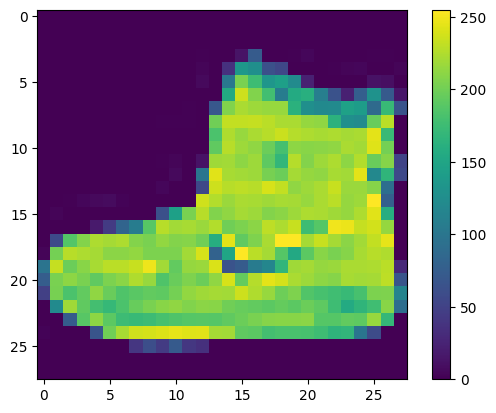

In [46]:
plt.figure()

plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network
model. To do so, divide the values by 255. It's important that the training set and the
testing set be preprocessed in the same way:

In [47]:
train_images = train_images / 255.0
test_images = test_images / 255.0

We can now verify that the data is in the correct format by displaying the first 25
images from the training set, along with the class name below each image.


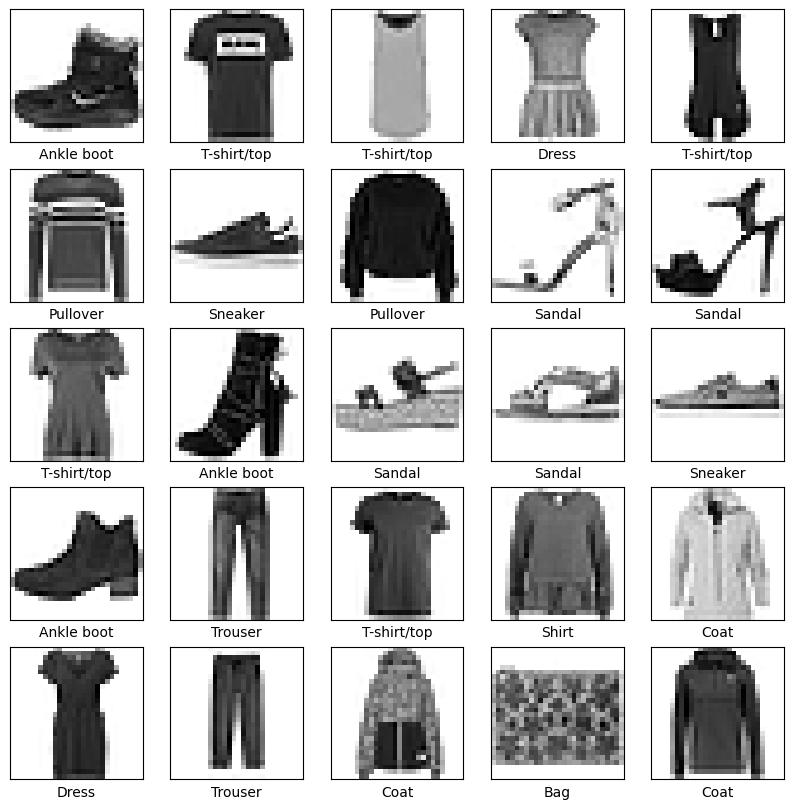

In [51]:
plt.figure(figsize=(10, 10))

for i in range(25):

    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])

    plt.grid(False)

    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

Now that the data has been loaded and verified, we can build the neural network,
which requires configuring the layers of the model and then compiling it.

The basic building block of a neural network is the layer. Layers extract
representations from the data fed into them. Hopefully, these representations are
meaningful for the problem at hand.

Most deep learning consists of chaining together simple layers. Most layers, such as
tf.keras.layers.Dense, have parameters that are learned during training.

In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the
images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array
(of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image
and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two
tf.keras.layers.Dense layers. These are densely connected, or fully-connected,
neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last)
layer returns a logits array with a length of 10. Each node contains a score that
indicates the current image belongs to one of the 10 classes. The softmax activation is
used, which indicates that the output will be in the range [0:1], indicating the
probability of the prediction belonging to each class.

We can now compile the model:

In [41]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Before the model is ready for training, it needs a few more settings. These are added
during the model's compile step:

    ● Loss function — This measures how accurate the model is during training. You
    want to minimise this function to "steer" the model in the right direction.
    ● Optimiser — This is how the model is updated based on the data it sees and its
    loss function.
    ● Metrics — Used to monitor the training and testing steps. The following
    example uses accuracy, the fraction of the images that are correctly classified.

The model is now ready to be trained. Training the neural network model requires the
following steps:

    ● Feed the training data to the model. In this example, the training data is in the
    train_images and train_labels arrays.
    ● The model learns to associate images and labels.
    ● You ask the model to make predictions about a test set — in this example, the
    test_images array.
    ● Verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method — so-called because it "fits" the model to
the training data. This method passes the training data through the network and
updates the weights and biases through backpropagation.

In [59]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8457 - loss: 0.4578
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8549 - loss: 0.4319
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8524 - loss: 0.4351
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8510 - loss: 0.4364
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8496 - loss: 0.4334
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8538 - loss: 0.4294
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8517 - loss: 0.4339
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8515 - loss: 0.4469
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8548 - loss: 0.4249
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8535 - loss: 0.4359


As the model trains, the loss and accuracy metrics are displayed. This model reaches
an accuracy of about 0.91 (or 91%) on the training data.

Now that the model has been trained, it can be used to make predictions for the test
data

In [60]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a
look at the first prediction

In [61]:
predictions[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.8730184e-02, 0.0000000e+00, 8.0979079e-01,
       2.5508241e-08, 1.7147905e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that
the image corresponds to each of the 10 different articles of clothing. You can see
which label has the highest confidence value:


In [62]:
np.argmax(predictions[0])

7

So, the model is most confident that this image is an ankle boot, or class_names[9].
Examining the test label shows that this classification is correct:


In [63]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [64]:
def plot_images(i, predictions_array, true_label, img):

    predictions_array, true_label, img = predictions_array, true_label[i], img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'

    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100 * np.max(predictions_array),
                                        class_names[true_label],
                                        color=color))

In [65]:
def plot_value_array(i, predictions_array, true_label):

    predictions_array, true_label = predictions_array, true_label[i]

    plt.grid(False)

    plt.xticks(range(10))
    plt.yticks([])

    plot = plt.bar(range(10), predictions_array, color='#777777')

    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

Using these methods, we can now verify predictions by displaying a few of the images
with their predictions:


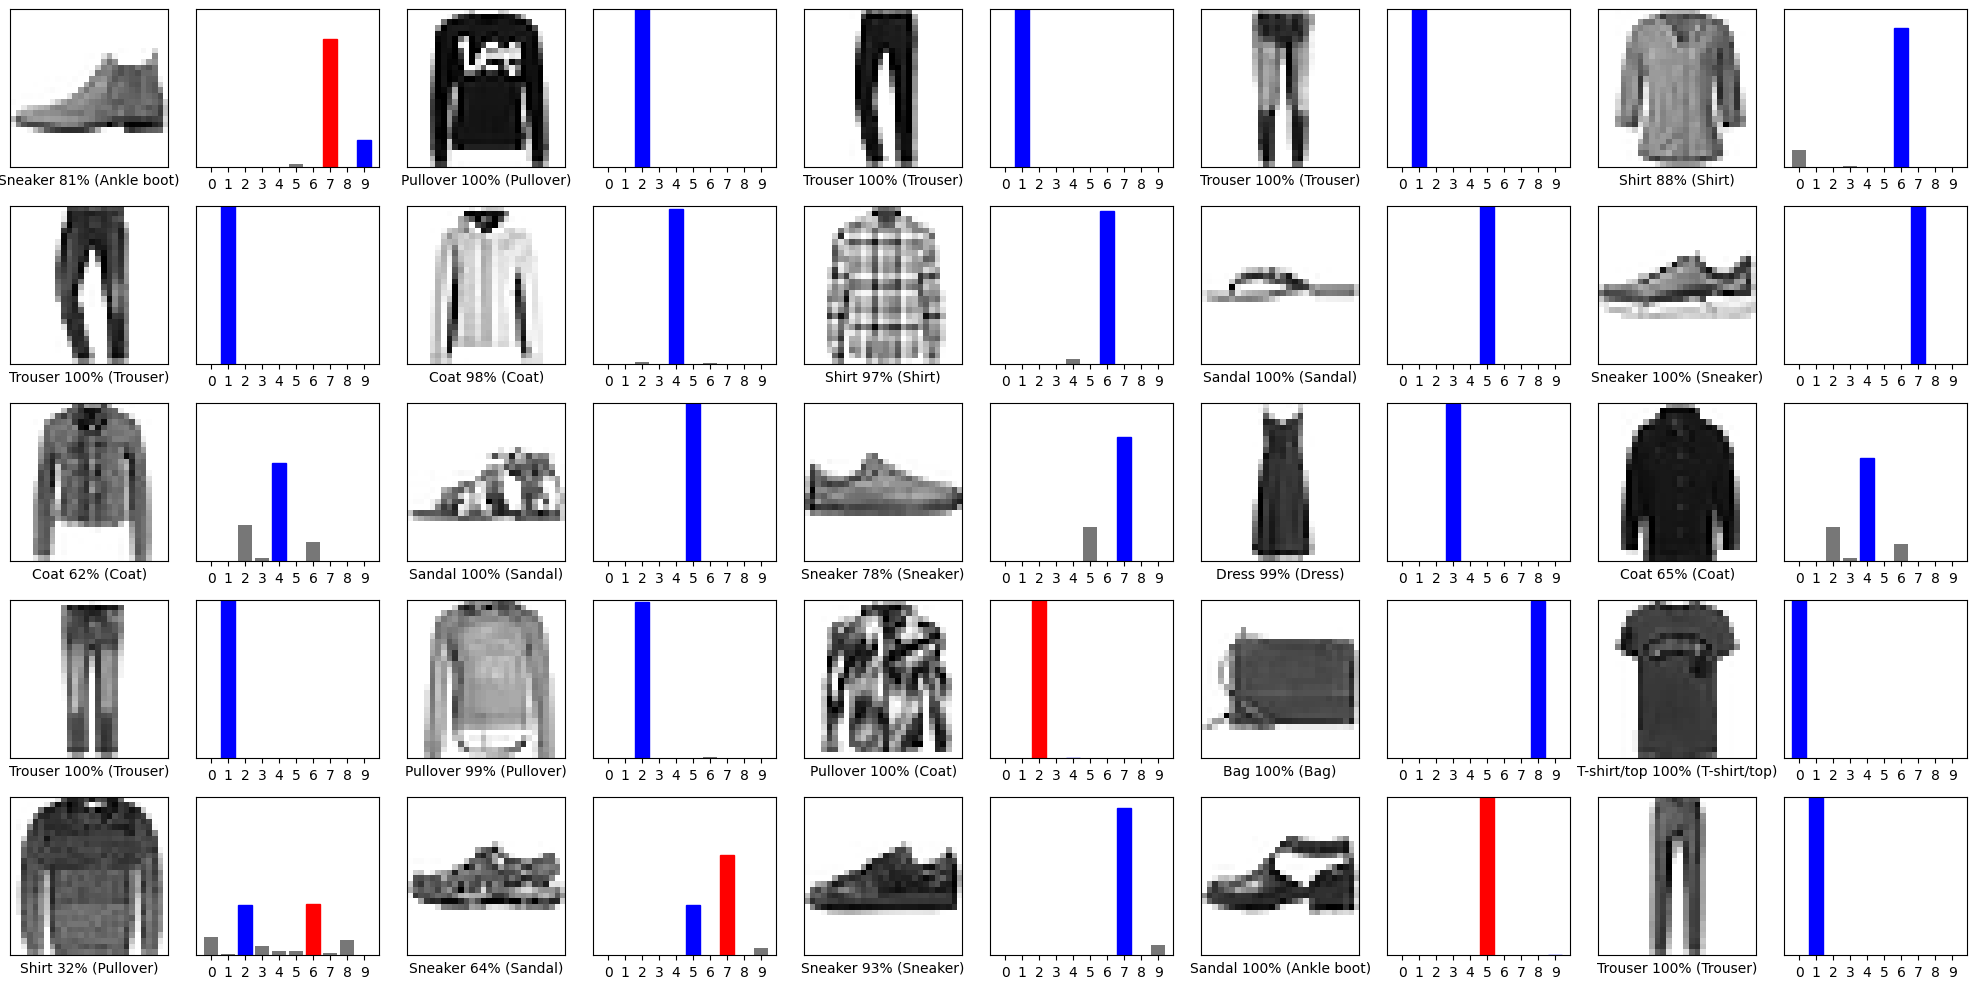

In [67]:
rows = 5
cols = 5

num_images = rows * cols

plt.figure(figsize=(2*2*cols, 2*rows))

for i in range(num_images):

    plt.subplot(rows, 2*cols, 2*i+1)
    plot_images(i, predictions[i], test_labels, test_images)

    plt.subplot(rows, 2*cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

Tensorflow.org (API Documentation) : https://www.tensorflow.org/api_docs

Guide to installing TensorFlow : https://www.tensorflow.org/install/

Fashion Dataset used in example : https://github.com/zalandoresearch/fashion-mnist

Original Tutorial From TensorFlow : https://www.tensorflow.org/tutorials/keras/classification